   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\yash3\AppData\Local\Temp\ipykernel_2948\1903618945.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\yash3\AppData\Local\Temp\ipykernel_2948\1903618945.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

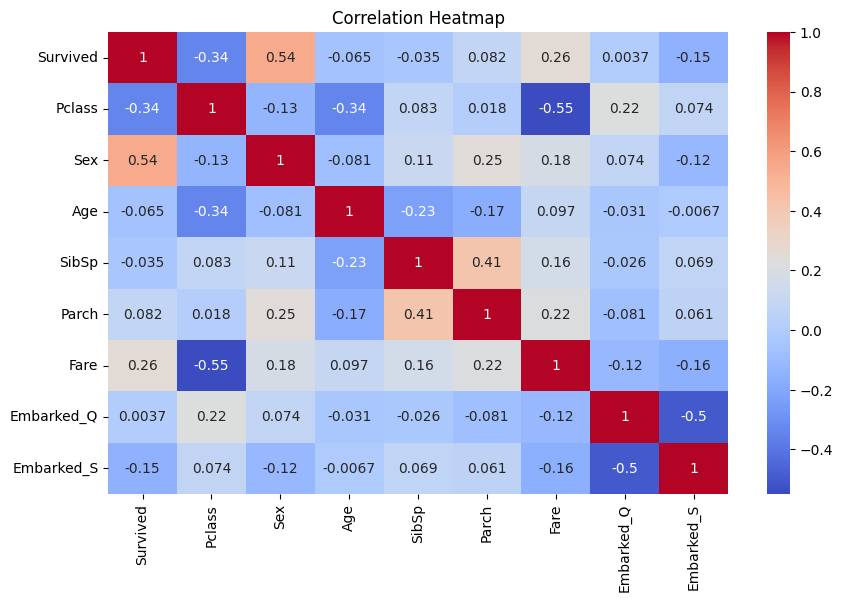

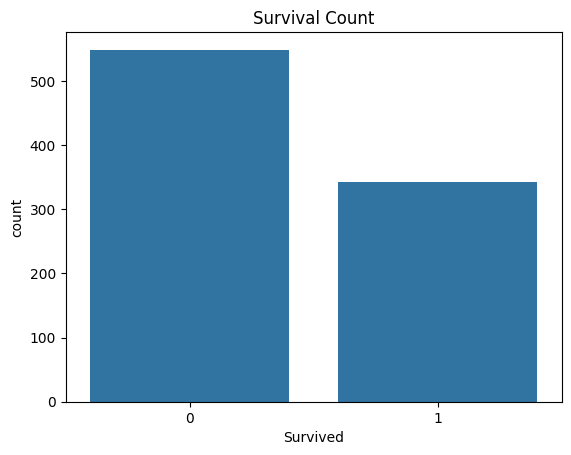

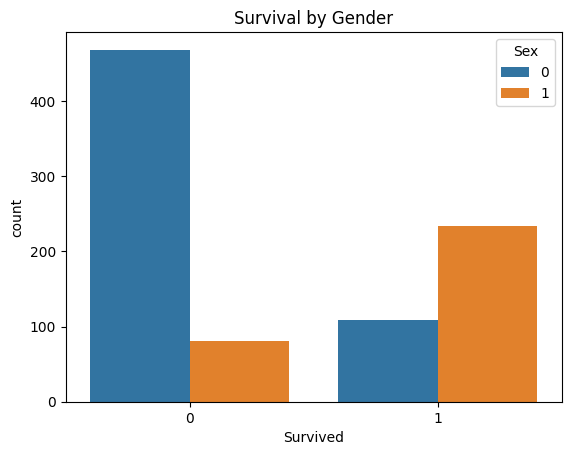

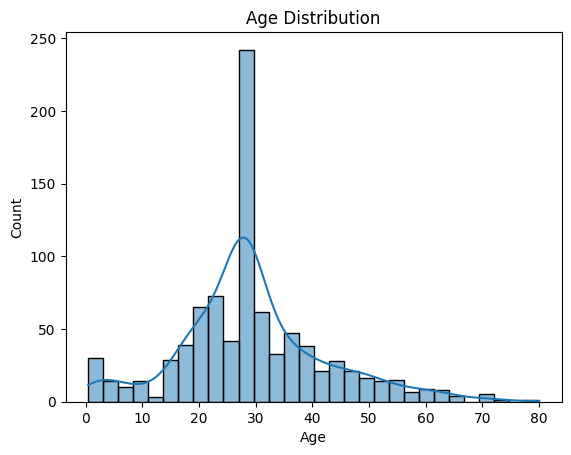

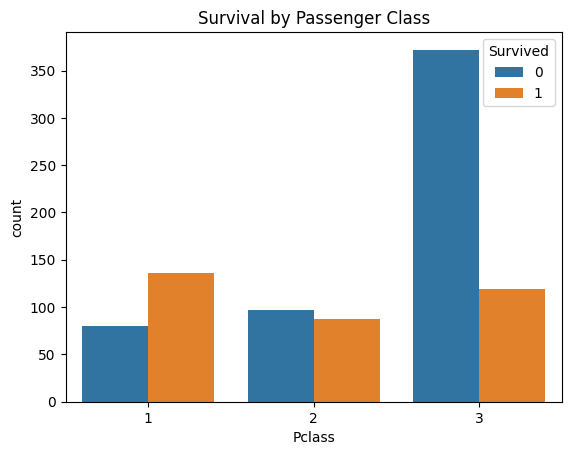

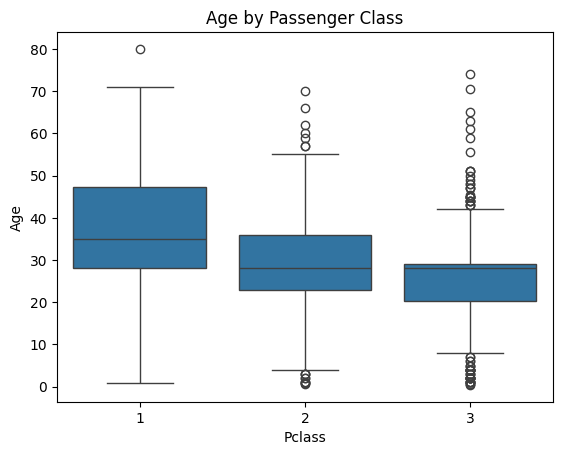

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Display first 5 rows
print(df.head())

# Basic info and stats
print(df.info())
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to many missing values
df.drop('Cabin', axis=1, inplace=True)

# Drop 'PassengerId', 'Name', and 'Ticket' as they're not useful for EDA
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Convert 'Sex' and 'Embarked' to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# ---------------------
# EXPLORATORY DATA ANALYSIS
# ---------------------

# 1. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2. Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# 3. Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

# 4. Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# 5. Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# 6. Boxplot of Age vs Pclass
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age by Passenger Class")
plt.show()
